import

In [19]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns



Load and Split the Data

We will use the Iris dataset for this example, but you can use any dataset that suits your task.

In [7]:
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Define the Model and Hyperparameter Grid

We will tune the hyperparameters of a Support Vector Machine (SVM) classifier, but you can easily extend this to other models such as Random Forests, Logistic Regression, etc.

In [8]:
model = SVC()

# hyperparameter grid to search
param_grid = {
    'C': [0.1, 1, 10],              # Regularization parameter
    'kernel': ['linear', 'rbf'],    # Kernel type
    'gamma': ['scale', 'auto'],     # Kernel coefficient
    'degree': [3, 4]                # Polynomial degree (used for 'poly' kernel)
}


Perform Grid Search with Cross-Validation

Use GridSearchCV to perform the grid search and find the best combination of hyperparameters. It will use cross-validation to evaluate each combination.

In [13]:
# Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best hyperparameters found: ", grid_search.best_params_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END ........C=0.1, degree=3, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ........C=0.1, degree=3, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ........C=0.1, degree=3, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ........C=0.1, degree=3, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ........C=0.1, degree=3, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ...........C=0.1, degree=3, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.1, degree=3, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.1, degree=3, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.1, degree=3, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .........C=0.1, degree=3, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ...........C=0.1, degree=3, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .........C=0.1, degree=3, gamma=auto, 

Evaluate the Best Model

After performing the grid search, the best hyperparameters are selected automatically. You can access the best estimator and evaluate it on the test set.

In [14]:
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
test_accuracy = best_model.score(X_test, y_test)
print(f"Test set accuracy with best model: {test_accuracy:.4f}")


Test set accuracy with best model: 1.0000


Review Grid Search Results

You can also inspect the results of the grid search (i.e., performance of all hyperparameter combinations evaluated).

In [15]:
results = grid_search.cv_results_

results_df = pd.DataFrame(results)

print(results_df[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values(by='rank_test_score').head())


                                               params  mean_test_score  \
12  {'C': 1, 'degree': 4, 'gamma': 'scale', 'kerne...         0.961905   
14  {'C': 1, 'degree': 4, 'gamma': 'auto', 'kernel...         0.961905   
10  {'C': 1, 'degree': 3, 'gamma': 'auto', 'kernel...         0.961905   
8   {'C': 1, 'degree': 3, 'gamma': 'scale', 'kerne...         0.961905   
15  {'C': 1, 'degree': 4, 'gamma': 'auto', 'kernel...         0.952381   

    std_test_score  rank_test_score  
12        0.035635                1  
14        0.035635                1  
10        0.035635                1  
8         0.035635                1  
15        0.042592                5  


Visualize the Grid Search Results (Optional)

You can visualize how different hyperparameter values affect the performance of the model. For example, let's visualize how the C and gamma hyperparameters affect the performance of an SVM model.

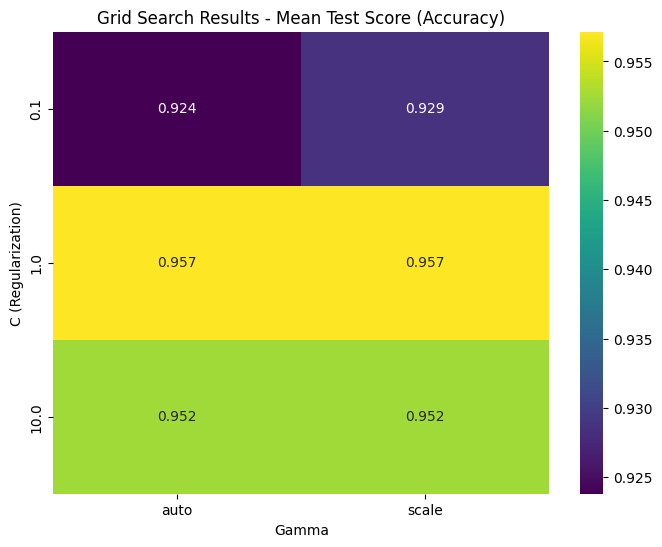

In [20]:
# Group by 'param_C' and 'param_gamma' and calculate the mean of 'mean_test_score'
results_aggregated = results_df.groupby(['param_C', 'param_gamma'], as_index=False)['mean_test_score'].mean()

# Extract the grid search results and pivot
scores_matrix = results_aggregated.pivot(index="param_C", columns="param_gamma", values="mean_test_score")

# Plot the heatmap of the mean test scores
plt.figure(figsize=(8, 6))
sns.heatmap(scores_matrix, annot=True, fmt=".3f", cmap="viridis")
plt.title("Grid Search Results - Mean Test Score (Accuracy)")
plt.xlabel("Gamma")
plt.ylabel("C (Regularization)")
plt.show()


Grid Search with Other Models

You can extend this approach to other machine learning models as well. For instance, for a Random Forest Classifier, you can tune the following hyperparameters:

In [21]:
rf_model = RandomForestClassifier(random_state=42)

#  hyperparameter grid to search
rf_param_grid = {
    'n_estimators': [50, 100, 200],     # Number of trees
    'max_depth': [None, 10, 20, 30],     # Maximum depth of trees
    'min_samples_split': [2, 5, 10],     # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4]        # Minimum samples required at a leaf node
}

# Grid Search with Random Forest
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
rf_grid_search.fit(X_train, y_train)

print("Best hyperparameters for Random Forest: ", rf_grid_search.best_params_)
rf_best_model = rf_grid_search.best_estimator_
rf_test_accuracy = rf_best_model.score(X_test, y_test)
print(f"Test set accuracy with best Random Forest model: {rf_test_accuracy:.4f}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_de

Grid Search is an effective way to tune hyperparameters for machine learning models and find the best configuration.

By using GridSearchCV in Scikit-learn, we perform an exhaustive search over the hyperparameter space while using cross-validation to prevent overfitting.

Visualizations of grid search results help to understand the impact of different hyperparameters on model performance.